In [2]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML, Image
from ipywidgets import interact,Dropdown,IntSlider,FloatRangeSlider, FloatSlider, RadioButtons
rc('animation', html='html5')
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']

In [3]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy

/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [4]:
colorsgallery = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229),
            (240,128,128),(233,150,122),(250,128,114),(255,160,122),
            (50,205,50),(144,238,144),(152,251,152),(143,188,143),
            (0,250,154),(0,255,127),(102,205,170),(60,179,113),
            (70,130,180),(100,149,237),(0,191,255),(30,144,255),
            (173,216,230),(135,206,235),(199,21,133),(219,112,147),
            (255,20,147),(255,105,180),(255,182,193),(255,192,203),(250,235,215)])/255.

In [5]:
colorsgallery.shape

(45, 3)

In [6]:
pwd

u'/Users/james/plot_segment'

In [7]:
imagedata = {}
for i in range(26):
    imagedata[i] = scipy.misc.imread('export_7.8/Axon_Seeding7.8-2.vsseg_export_s0'+str(i+9)+'.png')

In [8]:
uniqueind = np.unique(imagedata[0].reshape(-1,3),axis=0)

In [9]:
np.unique(imagedata[0].reshape(-1,3),return_counts=True,axis=0)

(array([[ 0,  0,  0],
        [ 1,  1,  1],
        [ 2,  2,  2],
        [ 3,  3,  3],
        [ 4,  4,  4],
        [ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        [ 9,  9,  9],
        [10, 10, 10],
        [11, 11, 11],
        [12, 12, 12],
        [13, 13, 13],
        [14, 14, 14],
        [15, 15, 15],
        [16, 16, 16],
        [17, 17, 17],
        [18, 18, 18],
        [19, 19, 19],
        [20, 20, 20],
        [21, 21, 21],
        [22, 22, 22],
        [25, 25, 25],
        [26, 26, 26],
        [27, 27, 27],
        [28, 28, 28],
        [29, 29, 29],
        [30, 30, 30],
        [31, 31, 31],
        [32, 32, 32],
        [33, 33, 33],
        [34, 34, 34],
        [35, 35, 35],
        [36, 36, 36],
        [38, 38, 38],
        [39, 39, 39],
        [40, 40, 40],
        [41, 41, 41],
        [42, 42, 42],
        [43, 43, 43],
        [44, 44, 44]], dtype=uint8),
 array([922001,   2605,   4547,   4446,   4301,    704,   196

In [10]:
np.unique(np.sum(imagedata[0].reshape(-1,3),axis=1),return_counts=True)

(array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
         39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  75,  78,  81,
         84,  87,  90,  93,  96,  99, 102, 105, 108, 114, 117, 120, 123,
        126, 129, 132], dtype=uint64),
 array([922001,   2605,   4547,   4446,   4301,    704,   1963,   2075,
          5097,   3217,   2528,   5761,   2075,   2744,   6314,   3104,
          3749,   5369,   2322,   2277,   4489,    181,  27282,   8369,
           305,  11399,  17769,   5526,   1666,   3509,   3673,   1839,
          3450,   1458,   3489,    740,   1690,   3513,   1937,   4230,
          3379,   2744]))

In [11]:
def transform_rgb(img):
    num = np.unique(img.reshape(-1,3),axis=0).shape[0]
    #print (num)
    #rgbarr = np.ndarray([num*3])
    #for i in range(num*3):
      #  rgbarr[i] = np.random.uniform(0,1)
    #rgbarr = rgbarr.reshape(-1,3)
    image = np.zeros([img.shape[0]*img.shape[1],3])
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    uniqueind = np.unique(img.reshape(-1,3),axis=0)
    for i in np.arange(0,num-1):
        image[sumimg==3*(uniqueind[i][0]+1)] = colorsgallery[i]
    #print (sumimg.shape)
    image[sumimg==0] = [1,1,1]
    return image.reshape(img.shape[0],img.shape[1],3)

In [141]:
def transform_single_pix(img):
    num = np.unique(imagedata.reshape(-1,3),axis=0).shape[0]
    #print (num)
    rgbarr = np.zeros([num])
    for i in range(num):
        rgbarr[i] = np.random.uniform(0,1)
    
    image = np.zeros([img.shape[0]*img.shape[1],1]).reshape(-1,1)
    sumimg = np.sum(img.reshape(-1,3),axis=1)
    #print (rgbarr.shape,image.shape,sumimg.shape)
    for i in np.arange(1,num):
        image[sumimg==3*uniqueind[i][0]] = rgbarr[i-1]
    #print (image.shape,img.shape)
    #print (sumimg.shape)
    return image.reshape(img.shape[0],img.shape[1])

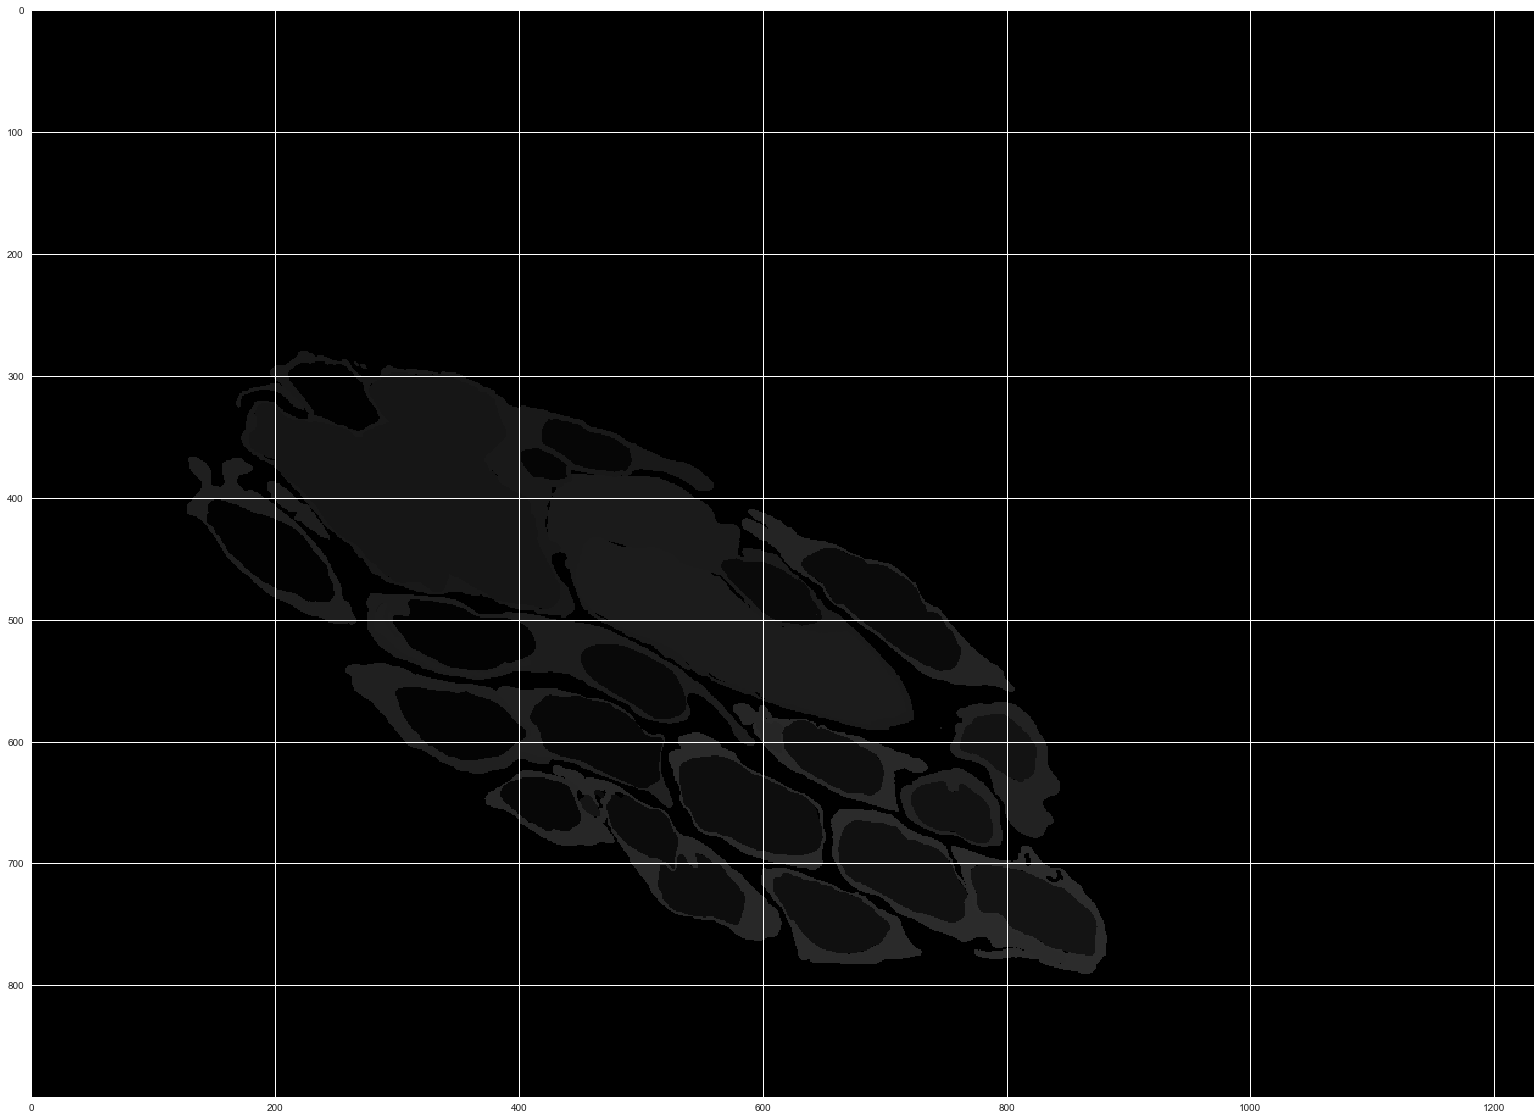

In [12]:
fig,ax=plt.subplots(1,figsize=(40,20))
ax.imshow(imagedata[0])

In [13]:
sns.set_context(contexts[0])
sns.set_style(styles[2])

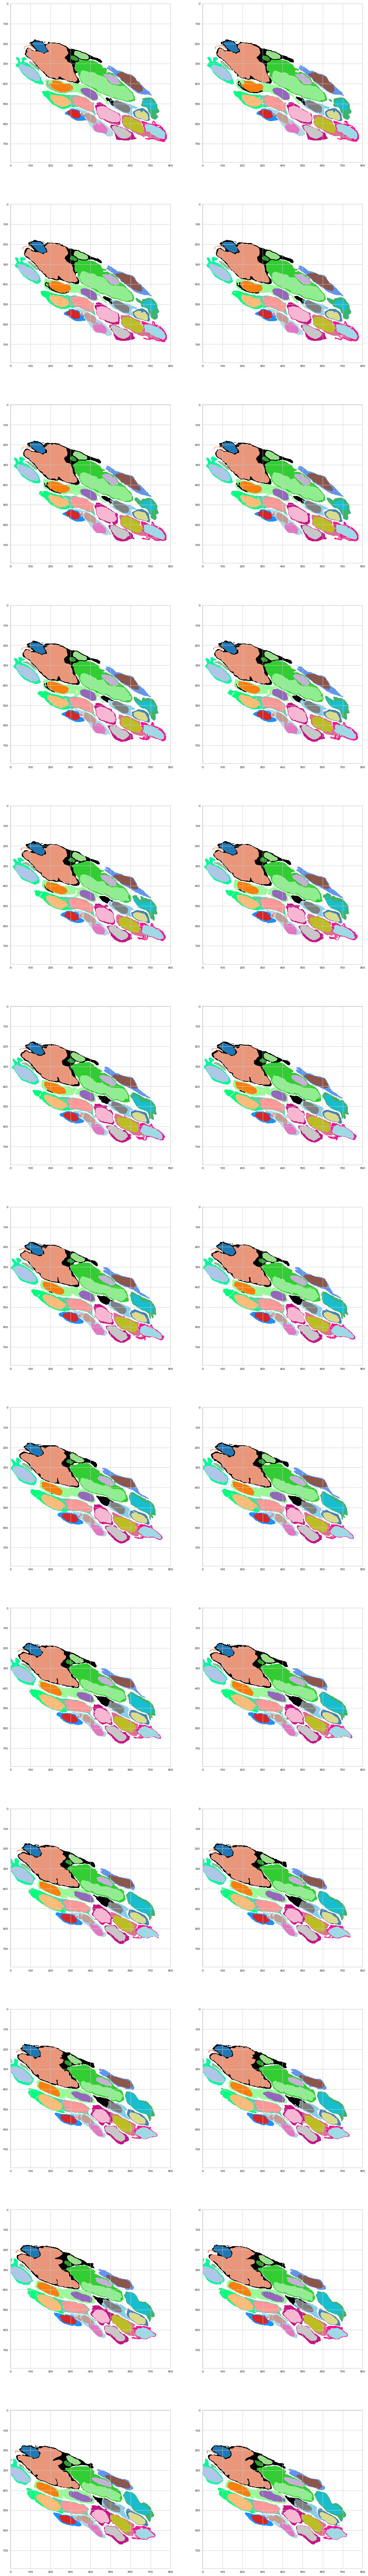

In [14]:
sizefact=10
fig,ax=plt.subplots(13,2,figsize=(16,12*sizefact))
for i in range(13):
    for j in range(2):
        ax[i,j].imshow(transform_rgb(imagedata[i*2+j][100:900,100:900]))

In [35]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
def animations(opt='show',type='gif'):
    '''
    opt: show/save
    type:gif/mp4
    '''
    imagelist = [transform_rgb(imagedata[i][100:900,100:900]) for i in range(26)]
    fig,ax=plt.subplots(1,figsize=(16,12)) 
    im =ax.imshow(imagelist[0])
    def updatefig(j):
        im.set_array(imagelist[j])
        return [im]
    anim = animation.FuncAnimation(fig, updatefig, frames=range(26), 
                                  interval=100, blit=True)
    if opt=='show':
        return anim
    elif opt=='save':
        if type=='mp4':
            Writer = animation.writers['ffmpeg']
            writer1 = Writer(fps=10)
            anim.save('animation.'+type, writer=writer1,dpi=1000)
        elif type=='gif':
            #Writer = animation.writers['imagemagick']
            anim.save('animation.'+type, writer='imagemagick', fps=10)
            
        

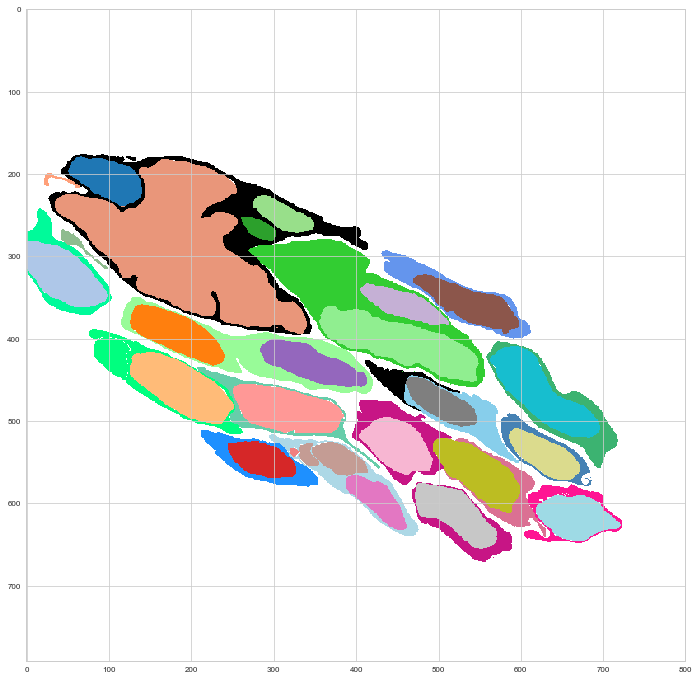

In [29]:
animations('show')

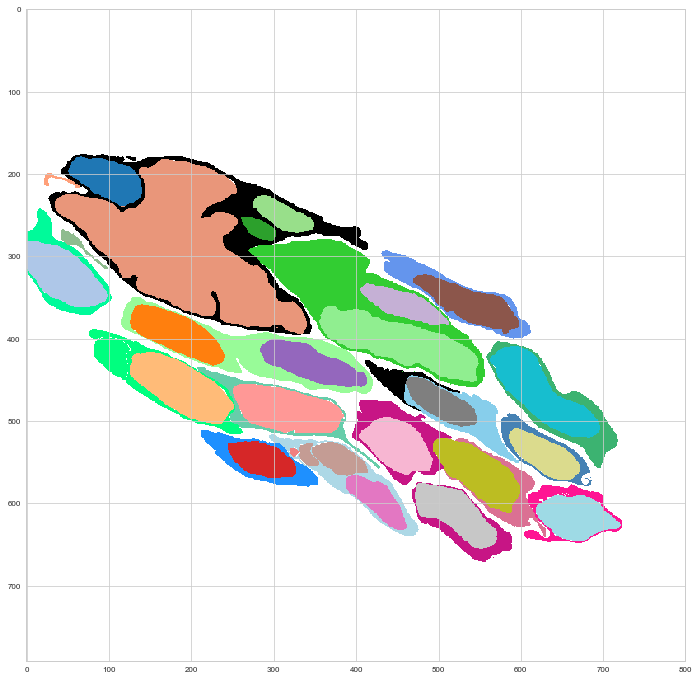

In [36]:
animations('save','mp4')

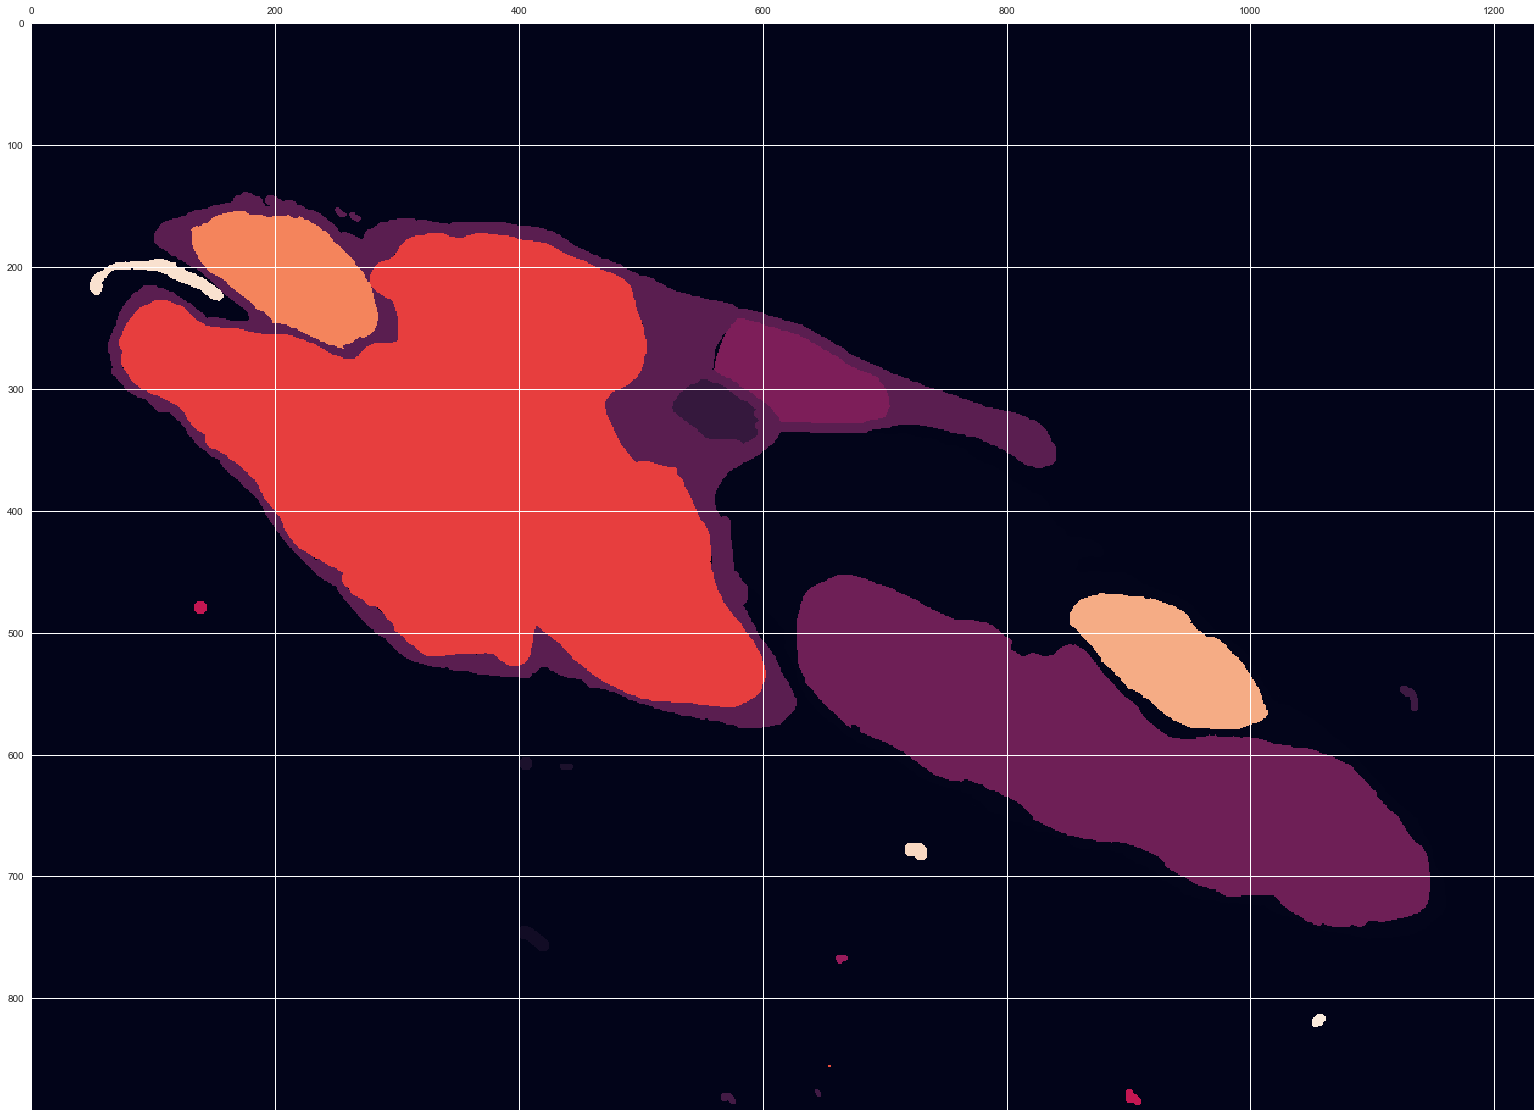

In [142]:
fig,ax=plt.subplots(1,figsize=(40,20))
ax.matshow(transform_single_pix(imagedata))

### display data by changing RGB value